# **雲端讀取資料**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **切割資料**

In [11]:
from sklearn.model_selection import train_test_split
D_train, D_test = train_test_split(D, test_size = 0.2, train_size = 0.8)

# **繪製資料方式(1)**

800


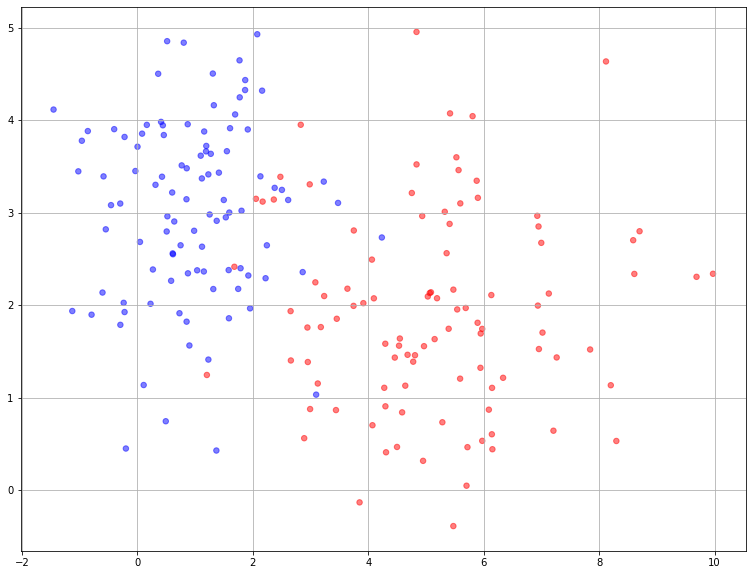

In [ ]:
import numpy as np

import scipy.linalg as LA
import matplotlib.pyplot as plt
# 1. load data
D = np.loadtxt('/content/drive/MyDrive/機器學習資料/la_1.txt',comments='%')
print(np.size(D))
# 2. Scatter plot
# −−− define attributes for the scatter plot
s = 30 # define the size of markers
# define the colors of markers according to group value 0, 1
# colors = D[:,2]
# colors = [’red’ if i == 0 else ’blue’ for i in D[:,2]]
colors = [[1,0,0] if i == 0 else [0,0,1] for i in D[:,2]]
plt.figure(figsize=(13,10))
plt.scatter(D[:, 0], D[:, 1], c = colors, s = s, marker = 'o', alpha =0.5)
plt.grid(True)
plt.show()

(Text(0.5, 0, '$X_1$'), Text(0, 0.5, '$X_2$'))

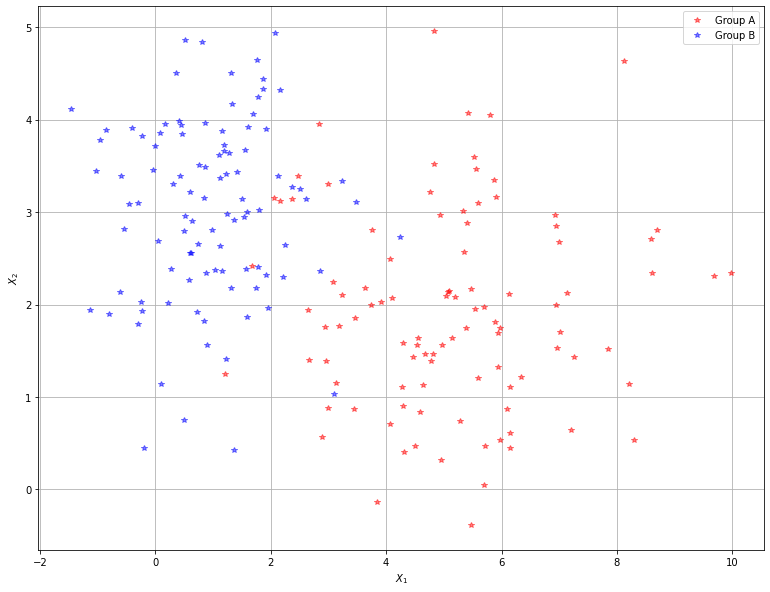

In [ ]:
plt.figure(figsize=(13,10))
Idx = (D[:,2]==0) #取出第3行等於零的列數，等於零的列為True
plt.plot(D[Idx, 0], D[Idx, 1], 'r*',alpha = 0.5, label = 'Group A')#D[Idx, 0]為X1值, D[Idx, 1]為X2值
Idx = (D[:,2]==1)
plt.plot(D[Idx,0], D[Idx,1],'b*', alpha = 0.5, label = 'Group B')
plt.legend(), plt.grid(True)
plt.xlabel('$X_1$'), plt.ylabel('$X_2$')


[ 0.74187066 -0.14767403  0.08354328]


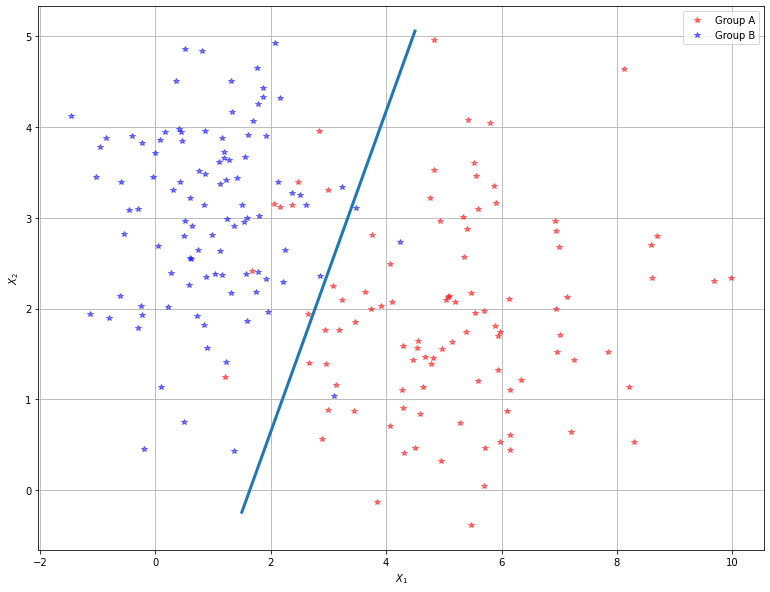

In [ ]:
plt.figure(figsize=(13,10))
Idx = (D[:,2]==0) #取出第3行等於零的列數，等於零的列為True
plt.plot(D[Idx, 0], D[Idx, 1], 'r*',alpha = 0.5, label = 'Group A')#D[Idx, 0]為X1值, D[Idx, 1]為X2值
Idx = (D[:,2]==1)
plt.plot(D[Idx,0], D[Idx,1],'b*', alpha = 0.5, label = 'Group B')
plt.legend(), plt.grid(True)
plt.xlabel('$X_1$'), plt.ylabel('$X_2$')
# 3. Estimate the coefficients
n = len(D[:, 0])
X = np.hstack((np.ones((n, 1)), D[:, 0:2]))
y = D[:, 2]

b = LA.inv(X.T @ X) @ X.T @ y # X.T(3xn), X(nx3), y(nx1), y.T(1xn)
print(b)
7
# Draw a linear regression line
x = np.array([1.5, 4.5])
y = -(b[0] - 0.5 + b[1] * x) / b[2]
plt.plot(x, y, lw=3)
plt.show()

800


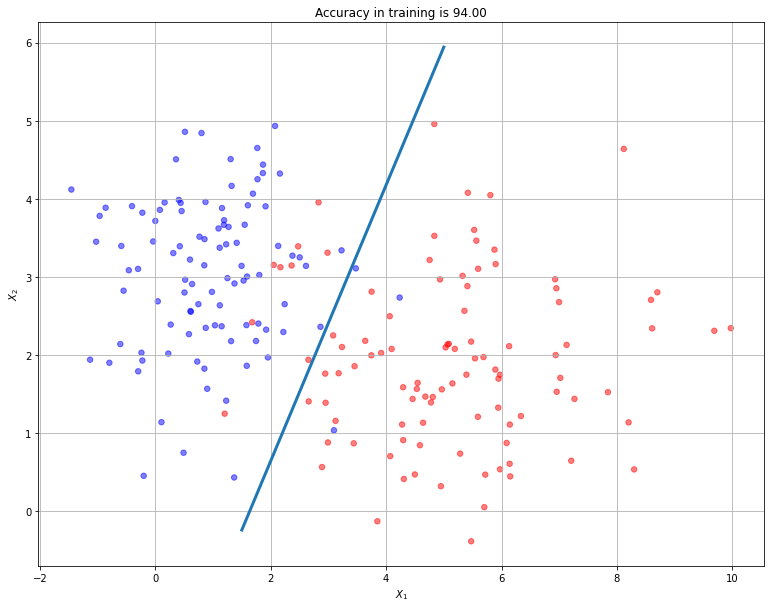

In [ ]:
from sklearn.linear_model import LinearRegression

import numpy as np
import scipy.linalg as LA
import matplotlib.pyplot as plt
# 1. load data
D = np.loadtxt('/content/drive/MyDrive/機器學習資料/la_1.txt',comments='%')
print(np.size(D))
# 2. Scatter plot
# −−− define attributes for the scatter plot
s = 30 # define the size of markers
# define the colors of markers according to group value 0, 1
# colors = D[:,2]
# colors = [’red’ if i == 0 else ’blue’ for i in D[:,2]]
colors = [[1,0,0] if i == 0 else [0,0,1] for i in D[:,2]]
plt.figure(figsize=(13,10))
plt.scatter(D[:, 0], D[:, 1], c = colors, s = s, marker = 'o', alpha =0.5)
plt.grid(True)
# Linear Regression by sklearn
n = len(D[:, 0])
X = D[:, 0:2]
y = D[:, 2]
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X, y) # 進行估計 （ 配適 ）
# R2 = Mdl.score(X, y) # R−square
intrcp = Mdl.intercept_ # 估計結果 ：beta0
coeffs = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
# Draw a regression line
x = np.array([1.5, 5])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]
plt.plot(x, f, lw=3)
# Calculate testing error
y_hat = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
plt.title('Accuracy in training is {:.2f}'.format(100 * np.mean(y_pre == y)))
plt.xlabel('$X_1$'), plt.ylabel('$X_2$')
plt.show()

# **資料生成**


# **兩群資料-距離近**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

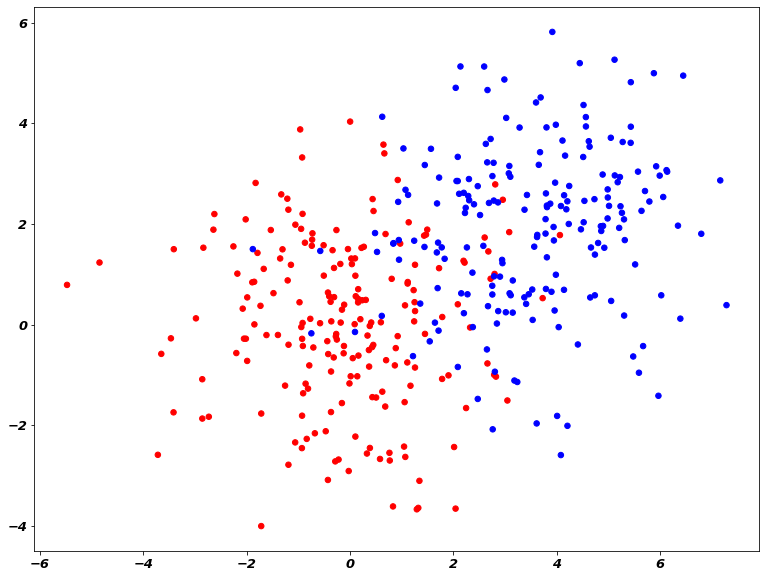

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
plt.figure(figsize=(13,10))
n1, n2 = 200, 200
m1, m2 = np.array([0, 0]), np.array([3.5, 2])
Cov1 = np.array([[2.5, 0], [0, 2.5]])
Cov2 = np.array([[2.5, 0], [0, 2.5]])
mvn1 = multivariate_normal(mean = m1, cov = Cov1)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
A, B = mvn1.rvs(n1), mvn2.rvs(n2)
X = np.vstack((A, B))
y = np.hstack((np.zeros(n1), np.ones(n2)))
np.savetxt('兩群資料_距離近.txt', np.c_[X, y],fmt = '%.4f %.4f %d', header = 'X1 X2 y')
colors = ['red' if i == 0 else 'blue' for i in y]
15
plt.scatter(X[:, 0], X[:, 1], c=colors, s=30, marker='o')
from google.colab import files
files.download('兩群資料_距離近.txt')

1200


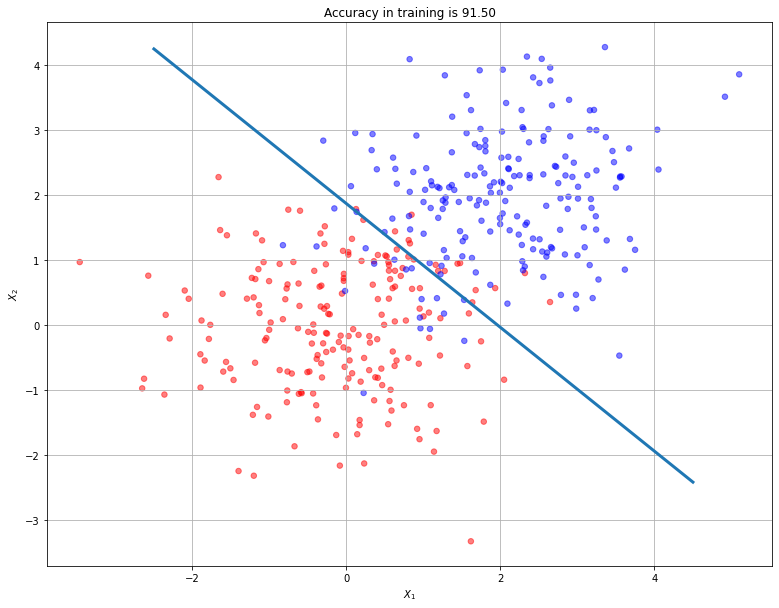

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import scipy.linalg as LA
import matplotlib.pyplot as plt
# 1. load data
D = np.loadtxt('/content/drive/MyDrive/機器學習資料/雙抽樣距離近.txt')
print(np.size(D))
s = 30
colors = [[1,0,0] if i == 0 else [0,0,1] for i in D[:,2]]
plt.figure(figsize=(13,10))
plt.scatter(D[:, 0], D[:, 1], c = colors, s = s, marker = 'o', alpha =0.5)
plt.grid(True)
# Linear Regression by sklearn
n = len(D[:, 0])
X = D[:, 0:2]
y = D[:, 2]
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X, y) # 進行估計 （ 配適 ）
# R2 = Mdl.score(X, y) # R−square
intrcp = Mdl.intercept_ # 估計結果 ：beta0
coeffs = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
# Draw a regression line
x = np.array([-2.5, 4.5])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]
plt.plot(x, f, lw=3)
# Calculate testing error
y_hat = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
plt.title('Accuracy in training is {:.2f}'.format(100 * np.mean(y_pre == y)))
plt.xlabel('$X_1$'), plt.ylabel('$X_2$')
plt.show()

# **切割資料**

In [5]:
from sklearn.linear_model import LinearRegression
import numpy as np
import scipy.linalg as LA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
D = np.loadtxt('/content/drive/MyDrive/機器學習資料/兩群資料_距離近.txt')
D_train, D_test = train_test_split(D, test_size = 0.2, train_size = 0.8)

# **訓練資料-雙抽樣距離近**

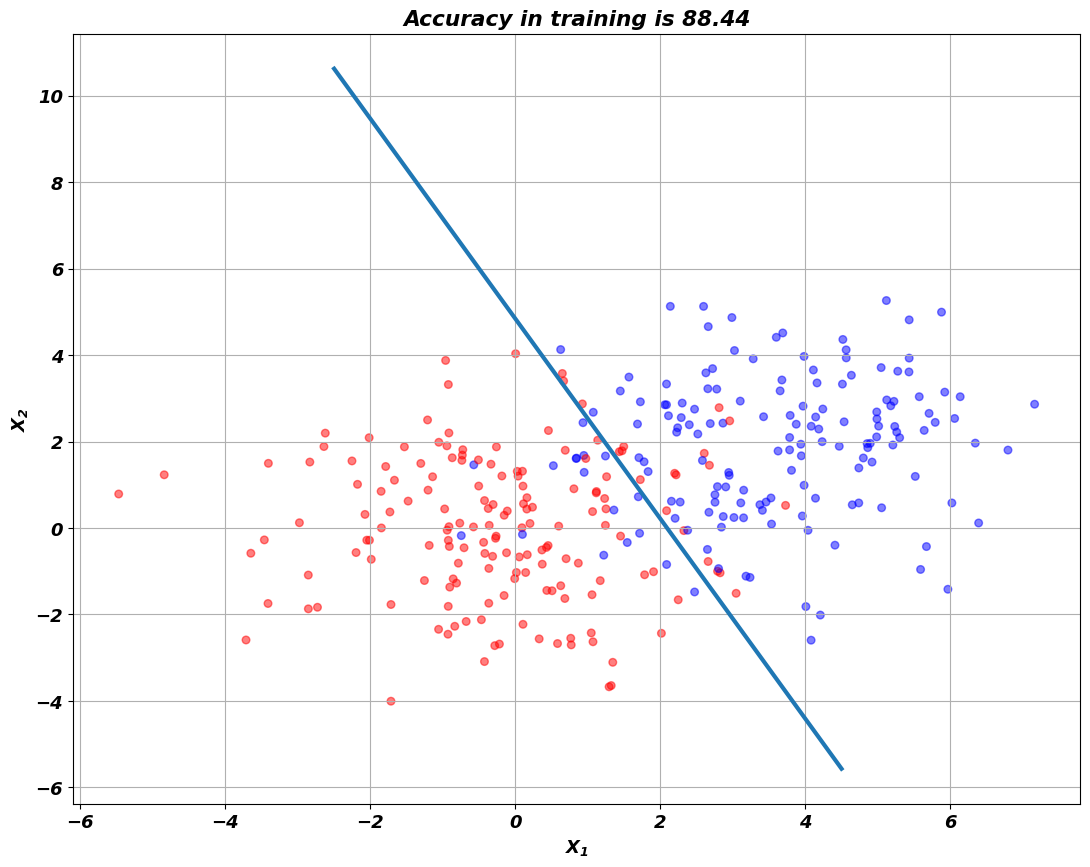

In [7]:
fontparams = {'font.size': 13, 'font.weight':'bold', 'font.family':'arial', 'font.style':'italic'}
plt.rcParams.update(fontparams)
labelparams = {'size': 14, 'weight':'semibold', 'family':'serif', 'style':'italic'}
# 1. load data
D = D_train
s = 30
colors = [[1,0,0] if i == 0 else [0,0,1] for i in D[:,2]]
plt.figure(figsize=(13,10))
plt.scatter(D[:, 0], D[:, 1], c = colors, s = s, marker = 'o', alpha =0.5)
plt.grid(True)
# Linear Regression by sklearn
n = len(D[:, 0])
X = D[:, 0:2]
y = D[:, 2]
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X, y) # 進行估計 （ 配適 ）
# R2 = Mdl.score(X, y) # R−square
intrcp = Mdl.intercept_ # 估計結果 ：beta0
coeffs = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
# Draw a regression line
x = np.array([-2.5, 4.5])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]
plt.plot(x, f, lw=3)
# Calculate testing error
y_hat = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
plt.title('Accuracy in training is {:.2f}'.format(100 * np.mean(y_pre == y)), weight = 'bold' ,ha="center")
plt.xlabel('$X_1$'), plt.ylabel('$X_2$')
plt.show()

# **測試資料-雙抽樣距離近**

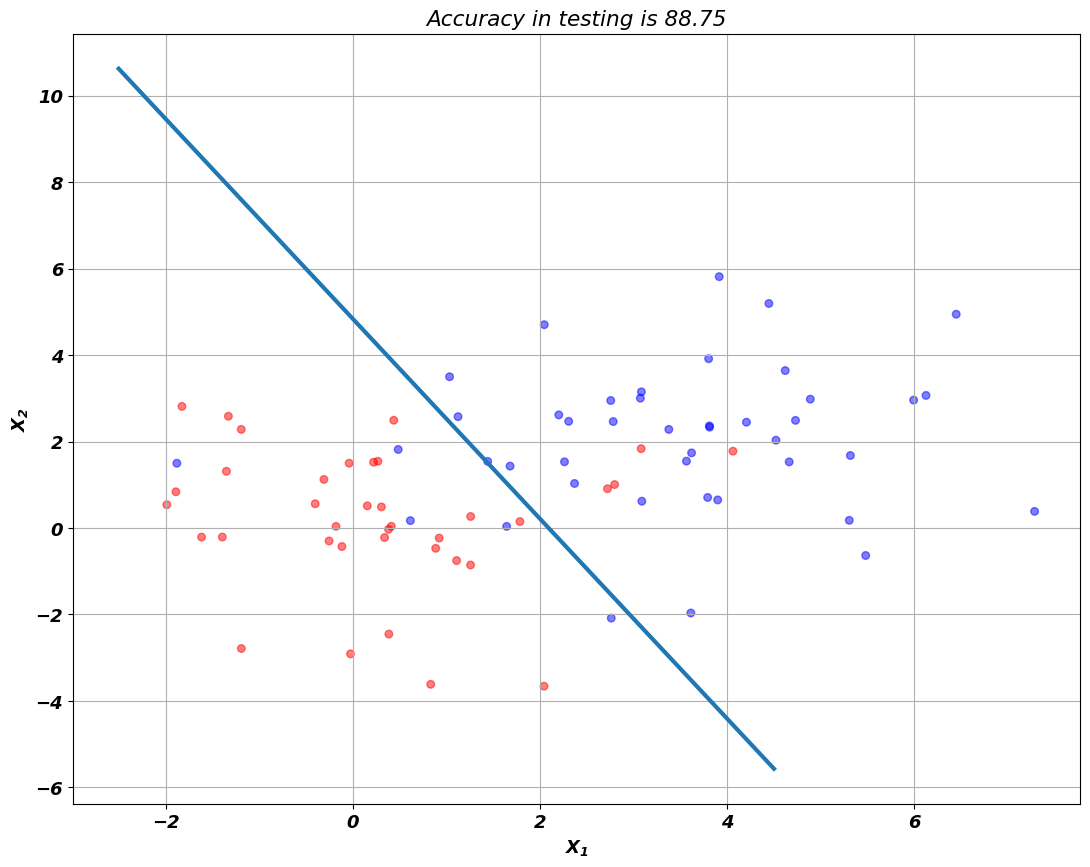

In [8]:
# 1. load data
D = D_test
s = 30
colors = [[1,0,0] if i == 0 else [0,0,1] for i in D[:,2]]
plt.figure(figsize=(13,10))
plt.scatter(D[:, 0], D[:, 1], c = colors, s = s, marker = 'o', alpha =0.5)
plt.grid(True)
# Linear Regression by sklearn
n = len(D[:, 0])
X = D[:, 0:2]
y = D[:, 2]
# Draw a regression line
x = np.array([-2.5, 4.5])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]
plt.plot(x, f, lw=3)
# Calculate testing error
y_hat = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
plt.title('Accuracy in testing is {:.2f}'.format(100 * np.mean(y_pre == y)))
plt.xlabel('$X_1$'), plt.ylabel('$X_2$')
plt.show()

## **合體-雙抽樣距離近**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

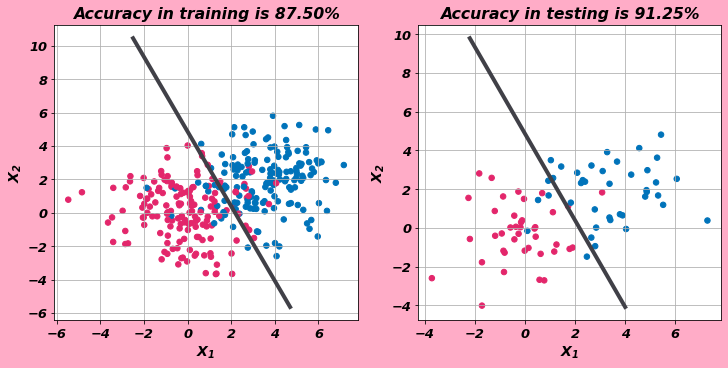

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
fontparams = {'font.size': 13, 'font.weight':'bold', 'font.family':'arial', 'font.style':'italic'}
plt.rcParams.update(fontparams)
labelparams = {'size': 14, 'weight':'semibold', 'family':'serif', 'style':'italic'}
fig, axes = plt.subplots(1, 2,figsize=(10,5), constrained_layout=True)
ax1 = axes[0]
ax2 = axes[1]
####################################
# 1. load data
D = D_train
s = 30
colors = [[0.89,0.15,0.42] if i == 0 else [0.0,0.45,0.73] for i in D[:,2]]
ax1.scatter(D[:, 0], D[:, 1], c = colors, s = s, marker = 'o')
ax1.grid(True)
# Linear Regression by sklearn
n = len(D[:, 0])
X = D[:, 0:2]
y = D[:, 2]
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X, y) # 進行估計 （ 配適 ）
# R2 = Mdl.score(X, y) # R−square
intrcp = Mdl.intercept_ # 估計結果 ：beta0
coeffs = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
# Draw a regression line
x = np.array([-2.5, 4.7])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]
ax1.plot(x, f, lw=4,c=[0.25,0.25,0.28])
# Calculate testing error
y_hat = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
ax1.set_title('Accuracy in training is {:.2f}%'.format(100 * np.mean(y_pre == y)), weight = 'bold' ,ha="center")
ax1.set_xlabel('$X_1$',labelparams)
ax1.set_ylabel('$X_2$',labelparams)
#####################################
D = D_test
s = 30
colors = [[0.89,0.15,0.42] if i == 0 else [0.0,0.45,0.73] for i in D[:,2]]
ax2.scatter(D[:, 0], D[:, 1], c = colors, s = s, marker = 'o')
ax2.grid(True)
# Linear Regression by sklearn
n = len(D[:, 0])
X = D[:, 0:2]
y = D[:, 2]
# Draw a regression line
x = np.array([-2.2, 4])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]
ax2.plot(x, f, lw=4,c=[0.25,0.25,0.28])
# Calculate testing error
y_hat = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
ax2.set_title('Accuracy in testing is {:.2f}%'.format(100 * np.mean(y_pre == y)), weight = 'bold' ,ha="center")
ax2.set_xlabel(r'$X_1$',labelparams)
ax2.set_ylabel(r'$X_2$',labelparams)
fig.set_facecolor('#FFACC7')
plt.savefig('簡單線性-兩群資料距離近.eps', format='eps', facecolor='#FFACC7',bbox_inches='tight', dpi=200)
from google.colab import files
files.download('簡單線性-兩群資料距離近.eps')
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import scipy.linalg as LA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
D = np.loadtxt('/content/drive/MyDrive/機器學習資料/兩群資料_距離近.txt')
D_train, D_test = train_test_split(D, test_size = 0.2, train_size = 0.8)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: UserWarning: The following kwargs were not used by contour: 'lw', 'label'


[0.23317131]
[[0.13571951 0.05622198]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

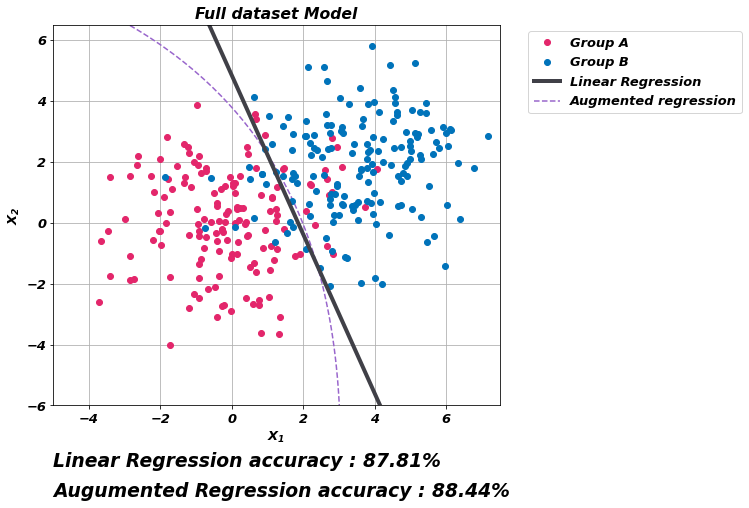

In [ ]:
import numpy as np
import scipy.linalg as LA
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
fontparams = {'font.size': 13, 'font.weight':'bold', 'font.family':'arial', 'font.style':'italic'}
plt.rcParams.update(fontparams)
labelparams = {'size': 14, 'weight':'semibold', 'family':'serif', 'style':'italic'}
D = D_train
n = len(D[:, 0])
s=30
colors = [[0.89,0.15,0.42] if i == 0 else [0.0,0.45,0.73] for i in D[:,2]]
plt.figure(figsize=(8,7))
#plt.scatter(D[:, 0], D[:, 1], c = colors, s = s, marker = 'o')
x= np.array([-0.7, 4.2])
X2 = np.c_[np.ones(n),D[:,0:2]]
y2 = D[:, 2]
b2 = LA.inv(X2.T @ X2) @ X2.T @ y2.T
x2 = np.array([-0.8, 4.5])
yhat2 = -(b2[0] - 0.5 + b2[1] * x2) / b2[2]
plt.xlim(-5, 7.5)
plt.ylim(-6, 6.5)
plt.legend(title = "accuracy"), plt.grid(True)
Idx = (D[:,2]==0)
plt.plot(D[Idx, 0], D[Idx, 1], "o",c=[0.89,0.15,0.42], label = "Group A")
Idx = (D[:,2]==1)
plt.plot(D[Idx,0], D[Idx,1],"o",c=[0.0,0.45,0.73] , label = "Group B")
plt.xlabel("$X_1$"), plt.ylabel("$X_2$")
n = len(D[:, 0])
x1 = D[:, 0:1] # n x 1 vector
x2 = D[:, 1:2]
Xgd = np.hstack((np.ones((n, 1)), \
x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
Xgdd = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = D[:, 2:3]
b = LA.pinv(Xgd) @ y # pseudo inverse
f = (
lambda x: b[0]
+ b[1] * x[0]
+ b[2] * x[1]
+ b[3] * x[0] * x[1]
+ b[4] * x[0] ** 2
+ b[5] * x[1] ** 2)
xx = np.linspace(-10, 10, 100)
yy = np.linspace(-10, 17, 100)
X, Y = np.meshgrid(xx, yy)
Z = f([X, Y])

contours = plt.contour(
X, Y, Z, levels = [0.5], colors='#9966CC', lw=5,linestyles='--',label='Augmented regression')
plt.title('Full dataset Model', weight = 'bold' ,ha="center")
contours.collections[0].set_label('Augmented regression')
plt.legend(title = 'Misclassification rate')
plt.legend(title = 'Augmented regression')
plt.grid(True)

mdgd = LinearRegression()
mdgd.fit(Xgdd,y)
mdgd_hat = mdgd.predict(Xgdd) # 預 測 或 計 算 擬 合 值
mdgd_pre = [1 if i > 0.5 else 0 for i in mdgd_hat] # 群組判讀
intrcpmd = mdgd.intercept_ # 估計結果 ：beta0
coeffsmd = mdgd.coef_ # # 估計結果 ：beta1, beta2, ...
X2 = np.c_[D[:,0:2]]
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X2, y) # 進行估計 （ 配適 ）
Mdl_hat = Mdl.predict(X2) # 預 測 或 計 算 擬 合 值
Mdl_pre = [1 if i > 0.5 else 0 for i in Mdl_hat] # 群組判讀
lrac =  '{:.2f}'.format(100 *  np.mean(Mdl_pre == D[:,2]))
arac =  '{:.2f}'.format(100 *  np.mean(mdgd_pre == D[:,2]))
plt.plot(x, yhat2, lw=4,label = 'Linear Regression',c=[0.25,0.25,0.28])
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1))

# # R2 = Mdl.score(X, y) # R−square
intrcp2 = Mdl.intercept_ # 估計結果 ：beta0
coeffs2 = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
print(intrcp2)
print(coeffs2)
plt.text(-5, -8.0, 'Linear Regression accuracy : ' + lrac +'%'  ,size='x-large')
plt.text(-5, -9, 'Augumented Regression accuracy : ' + arac +'%'  ,size='x-large')
plt.savefig('雙-兩群資料距離近.eps', format='eps', facecolor="#FFF89A",bbox_inches='tight', dpi=200)
from google.colab import files
files.download('雙-兩群資料距離近.eps')
plt.show()

# **兩群資料-距離遠**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

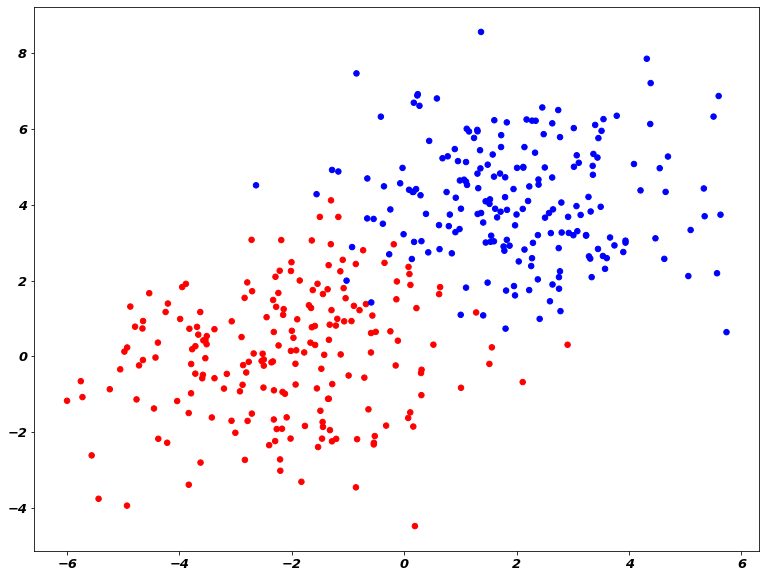

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
plt.figure(figsize=(13,10))
n1, n2 = 200, 200
m1, m2 = np.array([-2, 0]), np.array([2, 4])
Cov1 = np.array([[2.5, 0], [0, 2.5]])
Cov2 = np.array([[2.5, 0], [0, 2.5]])
mvn1 = multivariate_normal(mean = m1, cov = Cov1)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
A, B = mvn1.rvs(n1), mvn2.rvs(n2)
X = np.vstack((A, B))
y = np.hstack((np.zeros(n1), np.ones(n2)))
np.savetxt('兩群資料_距離遠.txt', np.c_[X, y],fmt = '%.4f %.4f %d', header = 'X1 X2 y')
colors = ['red' if i == 0 else 'blue' for i in y]
15
plt.scatter(X[:, 0], X[:, 1], c=colors, s=30, marker='o')
from google.colab import files
files.download('兩群資料_距離遠.txt')

# **兩群資料距離遠-切割資料**

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import scipy.linalg as LA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
D = np.loadtxt('/content/drive/MyDrive/機器學習資料/兩群資料_距離遠.txt')
D_train, D_test = train_test_split(D, test_size = 0.2, train_size = 0.8)

# **兩群資料距離遠-合體**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

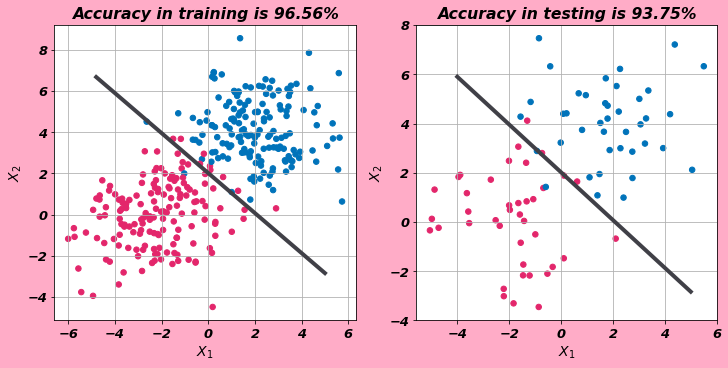

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
fontparams = {'font.size': 13, 'font.weight':'bold', 'font.family':'arial', 'font.style':'italic'}
plt.rcParams.update(fontparams)
labelparams = {'size': 14, 'weight':'semibold', 'family':'serif', 'style':'italic'}
fig, axes = plt.subplots(1, 2,figsize=(10,5), constrained_layout=True)
ax1 = axes[0]
ax2 = axes[1]
####################################
# 1. load data
D = D_train
s = 30
colors = [[0.89,0.15,0.42] if i == 0 else [0.0,0.45,0.73] for i in D[:,2]]
ax1.scatter(D[:, 0], D[:, 1], c = colors, s = s, marker = 'o')
ax1.grid(True)
# Linear Regression by sklearn
n = len(D[:, 0])
X = D[:, 0:2]
y = D[:, 2]
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X, y) # 進行估計 （ 配適 ）
# R2 = Mdl.score(X, y) # R−square
intrcp = Mdl.intercept_ # 估計結果 ：beta0
coeffs = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
# Draw a regression line
x = np.array([-4.8, 5])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]
ax1.plot(x, f, lw=4,c=[0.25,0.25,0.28])
# Calculate testing error
y_hat = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
ax1.set_title('Accuracy in training is {:.2f}%'.format(100 * np.mean(y_pre == y)), weight = 'bold' ,ha="center")
ax1.set_xlabel('$X_1$',labelparams)
ax1.set_ylabel('$X_2$',labelparams)

#####################################
D = D_test
s = 30
colors = [[0.89,0.15,0.42] if i == 0 else [0.0,0.45,0.73] for i in D[:,2]]
ax2.scatter(D[:, 0], D[:, 1], c = colors, s = s, marker = 'o')
ax2.grid(True)
# Linear Regression by sklearn
n = len(D[:, 0])
X = D[:, 0:2]
y = D[:, 2]
# Draw a regression line
x = np.array([-4, 5])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]
ax2.plot(x, f, lw=4,c=[0.25,0.25,0.28])
# Calculate testing error
y_hat = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
ax2.set_title('Accuracy in testing is {:.2f}%'.format(100 * np.mean(y_pre == y)), weight = 'bold' ,ha="center")
ax2.set_xlabel(r'$X_1$',labelparams)
ax2.set_ylabel(r'$X_2$',labelparams)
fig.set_facecolor('#FFACC7')
plt.savefig('簡單線性-兩群資料距離遠.eps', format='eps', facecolor='#FFACC7',bbox_inches='tight', dpi=200)
from google.colab import files
files.download('簡單線性-兩群資料距離遠.eps')
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: UserWarning: The following kwargs were not used by contour: 'lw', 'label'


[0.31173487]
[[0.0986315  0.09070882]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

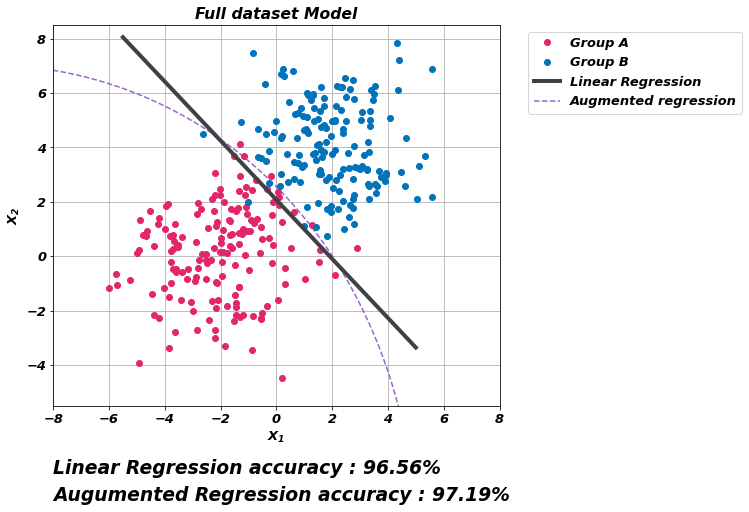

In [ ]:
import numpy as np
import scipy.linalg as LA
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
fontparams = {'font.size': 13, 'font.weight':'bold', 'font.family':'arial', 'font.style':'italic'}
plt.rcParams.update(fontparams)
labelparams = {'size': 14, 'weight':'semibold', 'family':'serif', 'style':'italic'}
D = D_train
n = len(D[:, 0])
s=25
colors = [[0.89,0.15,0.42] if i == 0 else [0.0,0.45,0.73] for i in D[:,2]]
plt.figure(figsize=(8,7))
#plt.scatter(D[:, 0], D[:, 1], c = colors, s = s, marker = 'o')
x = np.array([-5.5, 5.0])
X2 = np.c_[np.ones(n),D[:,0:2]]
y2 = D[:, 2]
b2 = LA.inv(X2.T @ X2) @ X2.T @ y2.T
x2 = np.array([-5.5, 5.0])
yhat2 = -(b2[0] - 0.5 + b2[1] * x2) / b2[2]
plt.xlim(-8, 8)
plt.ylim(-5.5, 8.5)
plt.legend(title = "accuracy"), plt.grid(True)
Idx = (D[:,2]==0)
plt.plot(D[Idx, 0], D[Idx, 1], "o",c=[0.89,0.15,0.42], label = "Group A")
Idx = (D[:,2]==1)
plt.plot(D[Idx,0], D[Idx,1],"o",c=[0.0,0.45,0.73] , label = "Group B")
plt.xlabel("$X_1$"), plt.ylabel("$X_2$")
n = len(D[:, 0])
x1 = D[:, 0:1] # n x 1 vector
x2 = D[:, 1:2]
Xgd = np.hstack((np.ones((n, 1)), \
x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
Xgdd = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = D[:, 2:3]
b = LA.pinv(Xgd) @ y # pseudo inverse
f = (
lambda x: b[0]
+ b[1] * x[0]
+ b[2] * x[1]
+ b[3] * x[0] * x[1]
+ b[4] * x[0] ** 2
+ b[5] * x[1] ** 2)
xx = np.linspace(-10, 10, 100)
yy = np.linspace(-10, 17, 100)
X, Y = np.meshgrid(xx, yy)
Z = f([X, Y])

contours = plt.contour(
X, Y, Z, levels = [0.5], colors='#9966CC', lw=5,linestyles='--',label='Augmented regression')
plt.title('Full dataset Model', weight = 'bold' ,ha="center")
contours.collections[0].set_label('Augmented regression')
plt.legend(title = 'Misclassification rate')
plt.legend(title = 'Augmented regression')
plt.grid(True)

mdgd = LinearRegression()
mdgd.fit(Xgdd,y)
mdgd_hat = mdgd.predict(Xgdd) # 預 測 或 計 算 擬 合 值
mdgd_pre = [1 if i > 0.5 else 0 for i in mdgd_hat] # 群組判讀
intrcpmd = mdgd.intercept_ # 估計結果 ：beta0
coeffsmd = mdgd.coef_ # # 估計結果 ：beta1, beta2, ...
X2 = np.c_[D[:,0:2]]
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X2, y) # 進行估計 （ 配適 ）
Mdl_hat = Mdl.predict(X2) # 預 測 或 計 算 擬 合 值
Mdl_pre = [1 if i > 0.5 else 0 for i in Mdl_hat] # 群組判讀
lrac =  '{:.2f}'.format(100 *  np.mean(Mdl_pre == D[:,2]))
arac =  '{:.2f}'.format(100 *  np.mean(mdgd_pre == D[:,2]))
plt.plot(x, yhat2, lw=4,label = 'Linear Regression',c=[0.25,0.25,0.28])
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1))

# # R2 = Mdl.score(X, y) # R−square
intrcp2 = Mdl.intercept_ # 估計結果 ：beta0
coeffs2 = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
print(intrcp2)
print(coeffs2)
plt.text(-8, -8.0, 'Linear Regression accuracy : ' + lrac +'%'  ,size='x-large')
plt.text(-8, -9.0, 'Augumented Regression accuracy : ' + arac +'%'  ,size='x-large')
plt.savefig('雙-兩群資料距離較遠.eps', format='eps', facecolor="#FFF89A",bbox_inches='tight', dpi=200)
from google.colab import files
files.download('雙-兩群資料距離較遠.eps')
plt.show()

# **兩群資料-密度高**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

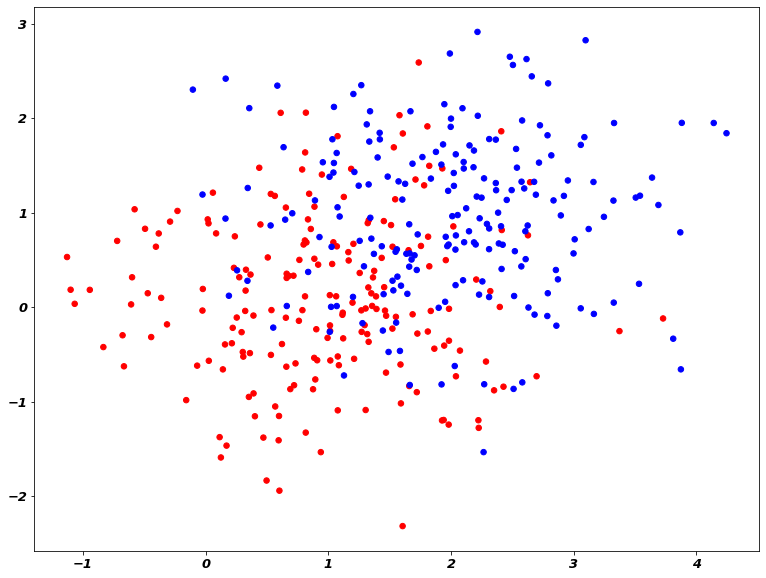

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
plt.figure(figsize=(13,10))
n1, n2 = 200, 200
m1, m2 = np.array([1, 0]), np.array([2, 1])
Cov1 = np.array([[0.7, 0], [0, 0.7]])
Cov2 = np.array([[0.7, 0], [0, 0.7]])
mvn1 = multivariate_normal(mean = m1, cov = Cov1)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
A, B = mvn1.rvs(n1), mvn2.rvs(n2)
X = np.vstack((A, B))
y = np.hstack((np.zeros(n1), np.ones(n2)))
np.savetxt('兩群資料_密度高.txt', np.c_[X, y],fmt = '%.4f %.4f %d', header = 'X1 X2 y')
colors = ['red' if i == 0 else 'blue' for i in y]
15
plt.scatter(X[:, 0], X[:, 1], c=colors, s=30, marker='o')
from google.colab import files
files.download('兩群資料_密度高.txt')

# **兩群資料變異程度小-切割

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import scipy.linalg as LA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
D = np.loadtxt('/content/drive/MyDrive/機器學習資料/兩群資料_密度高.txt')
D_train, D_test = train_test_split(D, test_size = 0.2, train_size = 0.8)

# **兩群資料變異程度小-合體**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

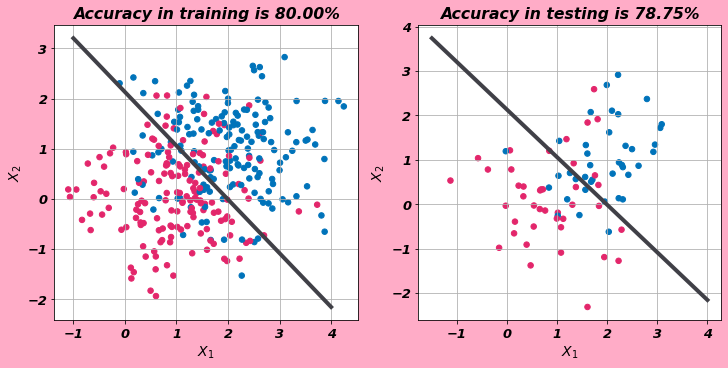

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
fontparams = {'font.size': 13, 'font.weight':'bold', 'font.family':'arial', 'font.style':'italic'}
plt.rcParams.update(fontparams)
labelparams = {'size': 14, 'weight':'semibold', 'family':'serif', 'style':'italic'}
fig, axes = plt.subplots(1, 2,figsize=(10,5), constrained_layout=True)
ax1 = axes[0]
ax2 = axes[1]
####################################
# 1. load data
D = D_train
s = 30
colors = [[0.89,0.15,0.42] if i == 0 else [0.0,0.45,0.73] for i in D[:,2]]
ax1.scatter(D[:, 0], D[:, 1], c = colors, s = s, marker = 'o')
ax1.grid(True)
# Linear Regression by sklearn
n = len(D[:, 0])
X = D[:, 0:2]
y = D[:, 2]
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X, y) # 進行估計 （ 配適 ）
# R2 = Mdl.score(X, y) # R−square
intrcp = Mdl.intercept_ # 估計結果 ：beta0
coeffs = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
# Draw a regression line
x = np.array([-1, 4])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]
ax1.plot(x, f, lw=4,c=[0.25,0.25,0.28])
# Calculate testing error
y_hat = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
ax1.set_title('Accuracy in training is {:.2f}%'.format(100 * np.mean(y_pre == y)), weight = 'bold' ,ha="center")
ax1.set_xlabel('$X_1$',labelparams)
ax1.set_ylabel('$X_2$',labelparams)

#####################################
D = D_test
s = 30
colors = [[0.89,0.15,0.42] if i == 0 else [0.0,0.45,0.73] for i in D[:,2]]
ax2.scatter(D[:, 0], D[:, 1], c = colors, s = s, marker = 'o')
ax2.grid(True)
# Linear Regression by sklearn
n = len(D[:, 0])
X = D[:, 0:2]
y = D[:, 2]
# Draw a regression line
x = np.array([-1.5, 4])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]
ax2.plot(x, f, lw=4,c=[0.25,0.25,0.28])
# Calculate testing error
y_hat = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
ax2.set_title('Accuracy in testing is {:.2f}%'.format(100 * np.mean(y_pre == y)), weight = 'bold' ,ha="center")
ax2.set_xlabel(r'$X_1$',labelparams)
ax2.set_ylabel(r'$X_2$',labelparams)
fig.set_facecolor('#FFACC7')
plt.savefig('簡單線性-兩群資料變異程度較小.eps', format='eps', facecolor='#FFACC7',bbox_inches='tight', dpi=200)
from google.colab import files
files.download('簡單線性-兩群資料變異程度較小.eps')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: UserWarning: The following kwargs were not used by contour: 'lw', 'label'


[0.07186986]
[[0.223579   0.19369155]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

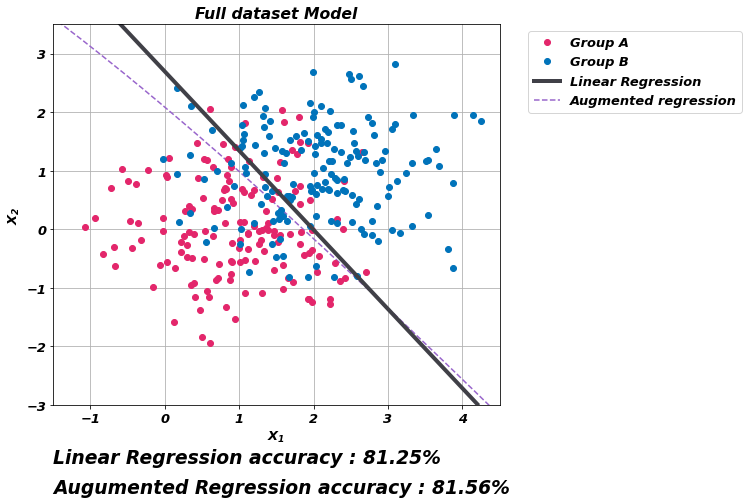

In [ ]:
import numpy as np
import scipy.linalg as LA
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
fontparams = {'font.size': 13, 'font.weight':'bold', 'font.family':'arial', 'font.style':'italic'}
plt.rcParams.update(fontparams)
labelparams = {'size': 14, 'weight':'semibold', 'family':'serif', 'style':'italic'}
D = D_train
n = len(D[:, 0])
s=25
colors = [[0.89,0.15,0.42] if i == 0 else [0.0,0.45,0.73] for i in D[:,2]]
plt.figure(figsize=(8,7))
#plt.scatter(D[:, 0], D[:, 1], c = colors, s = s, marker = 'o')
x = np.array([-2.2, 4.2])
X2 = np.c_[np.ones(n),D[:,0:2]]
y2 = D[:, 2]
b2 = LA.inv(X2.T @ X2) @ X2.T @ y2.T
x2 = np.array([-3, 4.5])
yhat2 = -(b2[0] - 0.5 + b2[1] * x2) / b2[2]
plt.xlim(-1.5, 4.5)
plt.ylim(-3, 3.5)
plt.legend(title = "accuracy"), plt.grid(True)
Idx = (D[:,2]==0)
plt.plot(D[Idx, 0], D[Idx, 1], "o",c=[0.89,0.15,0.42], label = "Group A")
Idx = (D[:,2]==1)
plt.plot(D[Idx,0], D[Idx,1],"o",c=[0.0,0.45,0.73] , label = "Group B")
plt.xlabel("$X_1$"), plt.ylabel("$X_2$")
n = len(D[:, 0])
x1 = D[:, 0:1] # n x 1 vector
x2 = D[:, 1:2]
Xgd = np.hstack((np.ones((n, 1)), \
x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
Xgdd = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = D[:, 2:3]
b = LA.pinv(Xgd) @ y # pseudo inverse
f = (
lambda x: b[0]
+ b[1] * x[0]
+ b[2] * x[1]
+ b[3] * x[0] * x[1]
+ b[4] * x[0] ** 2
+ b[5] * x[1] ** 2)
xx = np.linspace(-10, 10, 100)
yy = np.linspace(-10, 17, 100)
X, Y = np.meshgrid(xx, yy)
Z = f([X, Y])

contours = plt.contour(
X, Y, Z, levels = [0.5], colors='#9966CC', lw=5,linestyles='--',label='Augmented regression')
plt.title('Full dataset Model', weight = 'bold' ,ha="center")
contours.collections[0].set_label('Augmented regression')
plt.legend(title = 'Misclassification rate')
plt.legend(title = 'Augmented regression')
plt.grid(True)

mdgd = LinearRegression()
mdgd.fit(Xgdd,y)
mdgd_hat = mdgd.predict(Xgdd) # 預 測 或 計 算 擬 合 值
mdgd_pre = [1 if i > 0.5 else 0 for i in mdgd_hat] # 群組判讀
intrcpmd = mdgd.intercept_ # 估計結果 ：beta0
coeffsmd = mdgd.coef_ # # 估計結果 ：beta1, beta2, ...
X2 = np.c_[D[:,0:2]]
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X2, y) # 進行估計 （ 配適 ）
Mdl_hat = Mdl.predict(X2) # 預 測 或 計 算 擬 合 值
Mdl_pre = [1 if i > 0.5 else 0 for i in Mdl_hat] # 群組判讀
lrac =  '{:.2f}'.format(100 *  np.mean(Mdl_pre == D[:,2]))
arac =  '{:.2f}'.format(100 *  np.mean(mdgd_pre == D[:,2]))
plt.plot(x, yhat2, lw=4,label = 'Linear Regression',c=[0.25,0.25,0.28])
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1))

# # R2 = Mdl.score(X, y) # R−square
intrcp2 = Mdl.intercept_ # 估計結果 ：beta0
coeffs2 = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
print(intrcp2)
print(coeffs2)
plt.text(-1.5, -4.0, 'Linear Regression accuracy : ' + lrac +'%'  ,size='x-large')
plt.text(-1.5, -4.5, 'Augumented Regression accuracy : ' + arac +'%'  ,size='x-large')
plt.savefig('雙-兩群資料變異程度較小.eps', format='eps', facecolor="#FFF89A",bbox_inches='tight', dpi=200)
from google.colab import files
files.download('雙-兩群資料變異程度較小.eps')
plt.show()

# **兩群資料距離近**-變異程度大 切割資料

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import scipy.linalg as LA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
D = np.loadtxt('/content/drive/MyDrive/機器學習資料/兩群資料_密度低.txt')
D_train, D_test = train_test_split(D, test_size = 0.2, train_size = 0.8)

# **兩群資料距離近-變異程度大**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

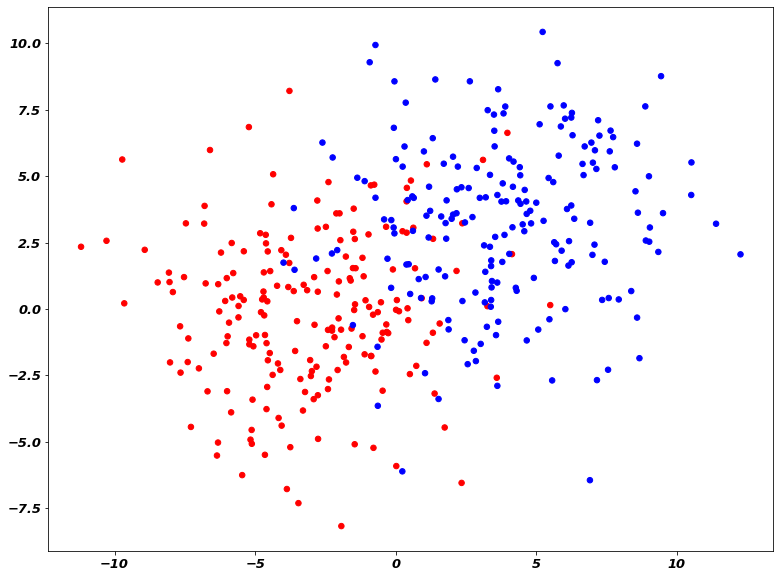

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
plt.figure(figsize=(13,10))
n1, n2 = 200, 200
m1, m2 = np.array([-3, 0]), np.array([4, 3])
Cov1 = np.array([[10, 0], [0, 8]])
Cov2 = np.array([[10, 0], [0, 8]])
mvn1 = multivariate_normal(mean = m1, cov = Cov1)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
A, B = mvn1.rvs(n1), mvn2.rvs(n2)
X = np.vstack((A, B))
y = np.hstack((np.zeros(n1), np.ones(n2)))
np.savetxt('兩群資料_密度低.txt', np.c_[X, y],fmt = '%.4f %.4f %d', header = 'X1 X2 y')
colors = ['red' if i == 0 else 'blue' for i in y]
15
plt.scatter(X[:, 0], X[:, 1], c=colors, s=30, marker='o')
from google.colab import files
files.download('兩群資料_密度低.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

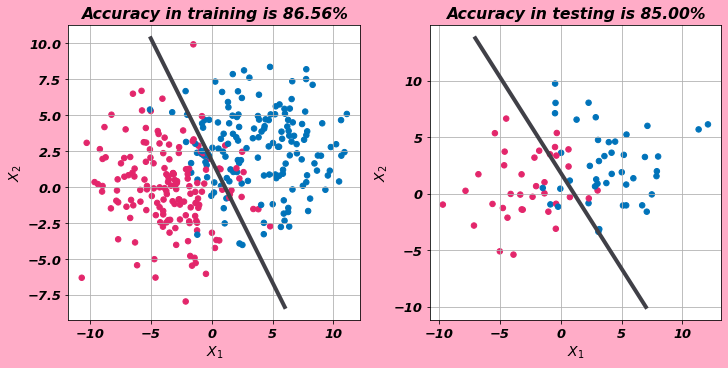

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
fontparams = {'font.size': 13, 'font.weight':'bold', 'font.family':'arial', 'font.style':'italic'}
plt.rcParams.update(fontparams)
labelparams = {'size': 14, 'weight':'semibold', 'family':'serif', 'style':'italic'}
fig, axes = plt.subplots(1, 2,figsize=(10,5), constrained_layout=True)
ax1 = axes[0]
ax2 = axes[1]
####################################
# 1. load data
D = D_train
s = 30
colors = [[0.89,0.15,0.42] if i == 0 else [0.0,0.45,0.73] for i in D[:,2]]
ax1.scatter(D[:, 0], D[:, 1], c = colors, s = s, marker = 'o')
ax1.grid(True)
# Linear Regression by sklearn
n = len(D[:, 0])
X = D[:, 0:2]
y = D[:, 2]
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X, y) # 進行估計 （ 配適 ）
# R2 = Mdl.score(X, y) # R−square
intrcp = Mdl.intercept_ # 估計結果 ：beta0
coeffs = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
# Draw a regression line
x = np.array([-5, 6])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]
ax1.plot(x, f, lw=4,c=[0.25,0.25,0.28])
# Calculate testing error
y_hat = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
ax1.set_title('Accuracy in training is {:.2f}%'.format(100 * np.mean(y_pre == y)), weight = 'bold' ,ha="center")
ax1.set_xlabel('$X_1$',labelparams)
ax1.set_ylabel('$X_2$',labelparams)

#####################################
D = D_test
s = 30
colors = [[0.89,0.15,0.42] if i == 0 else [0.0,0.45,0.73] for i in D[:,2]]
ax2.scatter(D[:, 0], D[:, 1], c = colors, s = s, marker = 'o')
ax2.grid(True)
# Linear Regression by sklearn
n = len(D[:, 0])
X = D[:, 0:2]
y = D[:, 2]
# Draw a regression line
x = np.array([-7, 7])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]
ax2.plot(x, f, lw=4,c=[0.25,0.25,0.28])
# Calculate testing error
y_hat = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
ax2.set_title('Accuracy in testing is {:.2f}%'.format(100 * np.mean(y_pre == y)), weight = 'bold' ,ha="center")
ax2.set_xlabel(r'$X_1$',labelparams)
ax2.set_ylabel(r'$X_2$',labelparams)
fig.set_facecolor('#FFACC7')
plt.savefig('簡單線性-兩群資料變異程度較大.eps', format='eps', facecolor='#FFACC7',bbox_inches='tight', dpi=200)
from google.colab import files
files.download('簡單線性-兩群資料變異程度較大.eps')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import scipy.linalg as LA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
D = np.loadtxt('/content/drive/MyDrive/機器學習資料/兩群資料_密度低.txt')
D_train, D_test = train_test_split(D, test_size = 0.3, train_size = 0.7)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: UserWarning: The following kwargs were not used by contour: 'lw', 'label'


[0.43174186]
[[0.0739947  0.03414357]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

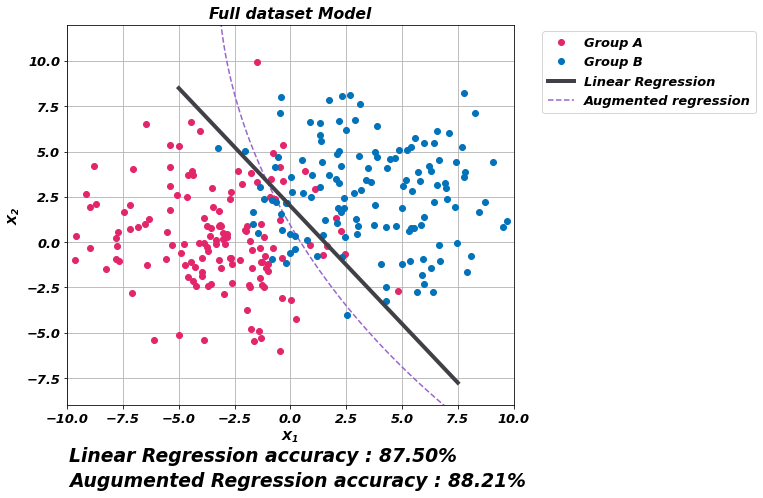

In [ ]:
import numpy as np
import scipy.linalg as LA
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
fontparams = {'font.size': 13, 'font.weight':'bold', 'font.family':'arial', 'font.style':'italic'}
plt.rcParams.update(fontparams)
labelparams = {'size': 14, 'weight':'semibold', 'family':'serif', 'style':'italic'}
D = D_train
n = len(D[:, 0])
s=25
colors = [[0.89,0.15,0.42] if i == 0 else [0.0,0.45,0.73] for i in D[:,2]]
plt.figure(figsize=(8,7))
#plt.scatter(D[:, 0], D[:, 1], c = colors, s = s, marker = 'o')
x = np.array([-5, 7.5])
X2 = np.c_[np.ones(n),D[:,0:2]]
y2 = D[:, 2]
b2 = LA.inv(X2.T @ X2) @ X2.T @ y2.T
x2 = np.array([-3, 4.5])
yhat2 = -(b2[0] - 0.5 + b2[1] * x2) / b2[2]
plt.xlim(-10, 10)
plt.ylim(-9, 12)
plt.legend(title = "accuracy"), plt.grid(True)
Idx = (D[:,2]==0)
plt.plot(D[Idx, 0], D[Idx, 1], "o",c=[0.89,0.15,0.42], label = "Group A")
Idx = (D[:,2]==1)
plt.plot(D[Idx,0], D[Idx,1],"o",c=[0.0,0.45,0.73] , label = "Group B")
plt.xlabel("$X_1$"), plt.ylabel("$X_2$")
n = len(D[:, 0])
x1 = D[:, 0:1] # n x 1 vector
x2 = D[:, 1:2]
Xgd = np.hstack((np.ones((n, 1)), \
x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
Xgdd = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = D[:, 2:3]
b = LA.pinv(Xgd) @ y # pseudo inverse
f = (
lambda x: b[0]
+ b[1] * x[0]
+ b[2] * x[1]
+ b[3] * x[0] * x[1]
+ b[4] * x[0] ** 2
+ b[5] * x[1] ** 2)
xx = np.linspace(-10, 10, 100)
yy = np.linspace(-10, 17, 100)
X, Y = np.meshgrid(xx, yy)
Z = f([X, Y])

contours = plt.contour(
X, Y, Z, levels = [0.5], colors='#9966CC', lw=5,linestyles='--',label='Augmented regression')
plt.title('Full dataset Model', weight = 'bold' ,ha="center")
contours.collections[0].set_label('Augmented regression')
plt.legend(title = 'Misclassification rate')
plt.legend(title = 'Augmented regression')
plt.grid(True)

mdgd = LinearRegression()
mdgd.fit(Xgdd,y)
mdgd_hat = mdgd.predict(Xgdd) # 預 測 或 計 算 擬 合 值
mdgd_pre = [1 if i > 0.5 else 0 for i in mdgd_hat] # 群組判讀
intrcpmd = mdgd.intercept_ # 估計結果 ：beta0
coeffsmd = mdgd.coef_ # # 估計結果 ：beta1, beta2, ...
X2 = np.c_[D[:,0:2]]
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X2, y) # 進行估計 （ 配適 ）
Mdl_hat = Mdl.predict(X2) # 預 測 或 計 算 擬 合 值
Mdl_pre = [1 if i > 0.5 else 0 for i in Mdl_hat] # 群組判讀
lrac =  '{:.2f}'.format(100 *  np.mean(Mdl_pre == D[:,2]))
arac =  '{:.2f}'.format(100 *  np.mean(mdgd_pre == D[:,2]))
plt.plot(x, yhat2, lw=4,label = 'Linear Regression',c=[0.25,0.25,0.28])
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1))

# # R2 = Mdl.score(X, y) # R−square
intrcp2 = Mdl.intercept_ # 估計結果 ：beta0
coeffs2 = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
print(intrcp2)
print(coeffs2)
plt.text(-9.9, -12.1, 'Linear Regression accuracy : ' + lrac +'%'  ,size='x-large')
plt.text(-9.9, -13.5, 'Augumented Regression accuracy : ' + arac +'%'  ,size='x-large')
plt.savefig('雙-兩群資料變異程度較大.eps', format='eps', facecolor="#FFF89A",bbox_inches='tight', dpi=200)
from google.colab import files
files.download('雙-兩群資料變異程度較大.eps')
plt.show()

# **兩群資料樣本數量相異-密度相異**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

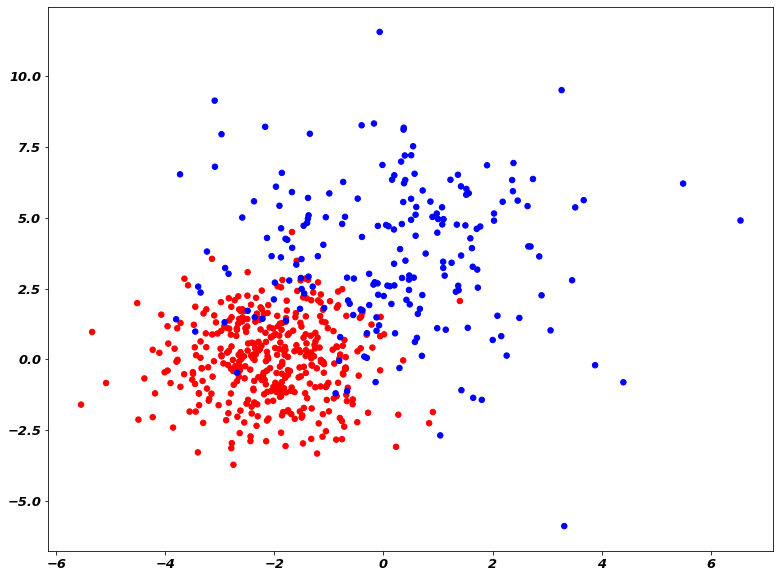

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
plt.figure(figsize=(13,10))
n1, n2 = 400, 200
m1, m2 = np.array([-2, 0]), np.array([0, 4])
Cov1 = np.array([[1, 0], [0, 2]])
Cov2 = np.array([[3, 0], [0, 6]])
mvn1 = multivariate_normal(mean = m1, cov = Cov1)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
A, B = mvn1.rvs(n1), mvn2.rvs(n2)
X = np.vstack((A, B))
y = np.hstack((np.zeros(n1), np.ones(n2)))
np.savetxt('兩群資料樣本數量相異-密度相異.eps', np.c_[X, y],fmt = '%.4f %.4f %d', header = 'X1 X2 y')
colors = ['red' if i == 0 else 'blue' for i in y]
15
plt.scatter(X[:, 0], X[:, 1], c=colors, s=30, marker='o')
from google.colab import files
files.download('兩群資料樣本數量相異-密度相異.eps')

兩群資料樣本數量相異-密度相異 切割資料

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import scipy.linalg as LA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
D = np.loadtxt('/content/drive/MyDrive/機器學習資料/兩群資料樣本數量相異_密度相異')
D_train, D_test = train_test_split(D, test_size = 0.2, train_size = 0.8)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

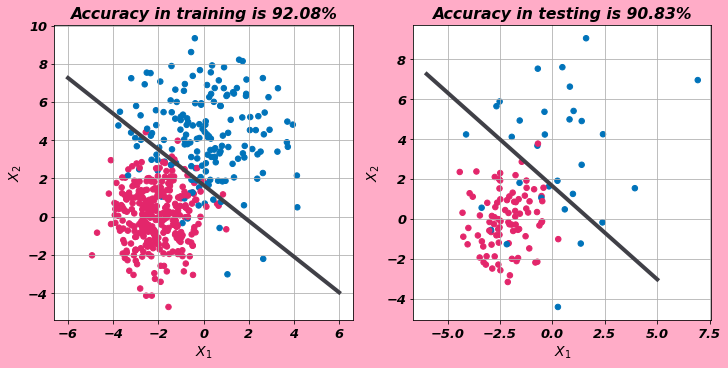

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
fontparams = {'font.size': 13, 'font.weight':'bold', 'font.family':'arial', 'font.style':'italic'}
plt.rcParams.update(fontparams)
labelparams = {'size': 14, 'weight':'semibold', 'family':'serif', 'style':'italic'}
fig, axes = plt.subplots(1, 2,figsize=(10,5), constrained_layout=True)
ax1 = axes[0]
ax2 = axes[1]
####################################
# 1. load data
D = D_train
s = 30
colors = [[0.89,0.15,0.42] if i == 0 else [0.0,0.45,0.73] for i in D[:,2]]
ax1.scatter(D[:, 0], D[:, 1], c = colors, s = s, marker = 'o')
ax1.grid(True)
# Linear Regression by sklearn
n = len(D[:, 0])
X = D[:, 0:2]
y = D[:, 2]
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X, y) # 進行估計 （ 配適 ）
# R2 = Mdl.score(X, y) # R−square
intrcp = Mdl.intercept_ # 估計結果 ：beta0
coeffs = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
# Draw a regression line
x = np.array([-6, 6])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]
ax1.plot(x, f, lw=4,c=[0.25,0.25,0.28])
# Calculate testing error
y_hat = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
ax1.set_title('Accuracy in training is {:.2f}%'.format(100 * np.mean(y_pre == y)), weight = 'bold' ,ha="center")
ax1.set_xlabel('$X_1$',labelparams)
ax1.set_ylabel('$X_2$',labelparams)

#####################################
D = D_test
s = 30
colors = [[0.89,0.15,0.42] if i == 0 else [0.0,0.45,0.73] for i in D[:,2]]
ax2.scatter(D[:, 0], D[:, 1], c = colors, s = s, marker = 'o')
ax2.grid(True)
# Linear Regression by sklearn
n = len(D[:, 0])
X = D[:, 0:2]
y = D[:, 2]
# Draw a regression line
x = np.array([-6, 5])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]
ax2.plot(x, f, lw=4,c=[0.25,0.25,0.28])
# Calculate testing error
y_hat = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
ax2.set_title('Accuracy in testing is {:.2f}%'.format(100 * np.mean(y_pre == y)), weight = 'bold' ,ha="center")
ax2.set_xlabel(r'$X_1$',labelparams)
ax2.set_ylabel(r'$X_2$',labelparams)
fig.set_facecolor('#FFACC7')
plt.savefig('兩群資料樣本數量相異-變異程度相異.eps', format='eps', facecolor='#FFACC7',bbox_inches='tight', dpi=200)
from google.colab import files
files.download('兩群資料樣本數量相異-變異程度相異.eps')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import scipy.linalg as LA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
D = np.loadtxt('/content/drive/MyDrive/機器學習資料/兩群資料樣本數量相異_密度相異')
D_train, D_test = train_test_split(D, test_size = 0.5, train_size = 0.5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: UserWarning: The following kwargs were not used by contour: 'lw', 'label'


[0.3338787]
[[0.09865347 0.10358585]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

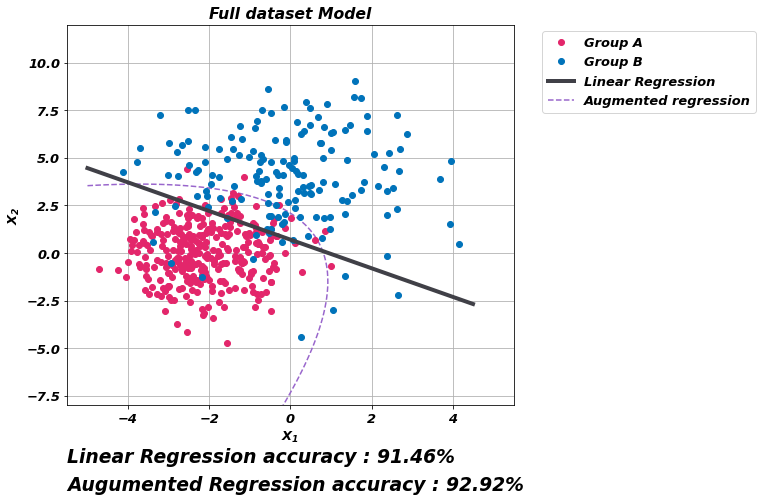

In [ ]:
import numpy as np
import scipy.linalg as LA
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
fontparams = {'font.size': 13, 'font.weight':'bold', 'font.family':'arial', 'font.style':'italic'}
plt.rcParams.update(fontparams)
labelparams = {'size': 14, 'weight':'semibold', 'family':'serif', 'style':'italic'}
D = D_train
n = len(D[:, 0])
s=25
colors = [[0.89,0.15,0.42] if i == 0 else [0.0,0.45,0.73] for i in D[:,2]]
plt.figure(figsize=(8,7))
#plt.scatter(D[:, 0], D[:, 1], c = colors, s = s, marker = 'o')
x = np.array([-5, 4.5])
X2 = np.c_[np.ones(n),D[:,0:2]]
y2 = D[:, 2]
b2 = LA.inv(X2.T @ X2) @ X2.T @ y2.T
x2 = np.array([-3, 4.5])
yhat2 = -(b2[0] - 0.5 + b2[1] * x2) / b2[2]
plt.xlim(-5.5, 5.5)
plt.ylim(-8, 12)
plt.legend(title = "accuracy"), plt.grid(True)
Idx = (D[:,2]==0)
plt.plot(D[Idx, 0], D[Idx, 1], "o",c=[0.89,0.15,0.42], label = "Group A")
Idx = (D[:,2]==1)
plt.plot(D[Idx,0], D[Idx,1],"o",c=[0.0,0.45,0.73] , label = "Group B")
plt.xlabel("$X_1$"), plt.ylabel("$X_2$")
n = len(D[:, 0])
x1 = D[:, 0:1] # n x 1 vector
x2 = D[:, 1:2]
Xgd = np.hstack((np.ones((n, 1)), \
x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
Xgdd = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = D[:, 2:3]
b = LA.pinv(Xgd) @ y # pseudo inverse
f = (
lambda x: b[0]
+ b[1] * x[0]
+ b[2] * x[1]
+ b[3] * x[0] * x[1]
+ b[4] * x[0] ** 2
+ b[5] * x[1] ** 2)
xx = np.linspace(-5, 5, 100)
yy = np.linspace(-10, 17, 100)
X, Y = np.meshgrid(xx, yy)
Z = f([X, Y])

contours = plt.contour(
X, Y, Z, levels = [0.5], colors='#9966CC', lw=5,linestyles='--',label='Augmented regression')
plt.title('Full dataset Model', weight = 'bold' ,ha="center")
contours.collections[0].set_label('Augmented regression')
plt.legend(title = 'Misclassification rate')
plt.legend(title = 'Augmented regression')
plt.grid(True)

mdgd = LinearRegression()
mdgd.fit(Xgdd,y)
mdgd_hat = mdgd.predict(Xgdd) # 預 測 或 計 算 擬 合 值
mdgd_pre = [1 if i > 0.5 else 0 for i in mdgd_hat] # 群組判讀
intrcpmd = mdgd.intercept_ # 估計結果 ：beta0
coeffsmd = mdgd.coef_ # # 估計結果 ：beta1, beta2, ...
X2 = np.c_[D[:,0:2]]
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X2, y) # 進行估計 （ 配適 ）
Mdl_hat = Mdl.predict(X2) # 預 測 或 計 算 擬 合 值
Mdl_pre = [1 if i > 0.5 else 0 for i in Mdl_hat] # 群組判讀
lrac =  '{:.2f}'.format(100 *  np.mean(Mdl_pre == D[:,2]))
arac =  '{:.2f}'.format(100 *  np.mean(mdgd_pre == D[:,2]))
plt.plot(x, yhat2, lw=4,label = 'Linear Regression',c=[0.25,0.25,0.28])
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1))

# # R2 = Mdl.score(X, y) # R−square
intrcp2 = Mdl.intercept_ # 估計結果 ：beta0
coeffs2 = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
print(intrcp2)
print(coeffs2)
plt.text(-5.5, -11, 'Linear Regression accuracy : ' + lrac +'%'  ,size='x-large')
plt.text(-5.5, -12.5, 'Augumented Regression accuracy : ' + arac +'%'  ,size='x-large')
plt.savefig('雙-兩群資料變異程度及樣本數相異.eps', format='eps', facecolor="#FFF89A",bbox_inches='tight', dpi=200)
from google.colab import files
files.download('雙-兩群資料變異程度及樣本數相異.eps')
plt.show()

羅吉斯回歸-資料生成

(500, 2) (500,)
Counter({1: 167, 0: 167, 2: 166})
[-2.78240559 -5.42289692] 2
[-6.54917469 -6.33626189] 2
[ 2.23906485 -7.75849061] 1
[ 2.06697221 -7.50721024] 1
[-0.71778507 -9.71648088] 1
[-9.71683155 -0.16799237] 0
[-9.36990811  1.03670078] 0
[-9.85216731  0.95073842] 0
[ -4.32748244 -11.13633937] 2
[-0.7432873  -6.06456673] 1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

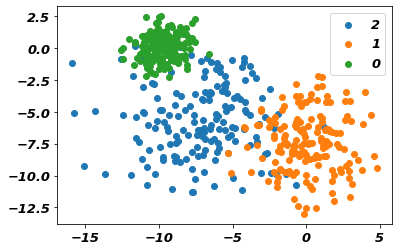

In [ ]:
# example of multi-class classification task
from numpy import where
from collections import Counter
from sklearn.datasets import make_blobs
from matplotlib import pyplot
# define dataset
X, y = make_blobs(n_samples=500, centers=3, random_state=9, cluster_std=[1.0,2.0,3.0])
# summarize dataset shape
print(X.shape, y.shape)
# summarize observations by class label
counter = Counter(y)
print(counter)
# summarize first few examples
for i in range(10):
	print(X[i], y[i])
# plot the dataset and color the by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
plt.savefig('log-scatter.eps', format='eps',bbox_inches='tight', dpi=200)
from google.colab import files
files.download('log-scatter.eps')
pyplot.show()


In [ ]:
!pip install  scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


(500, 2) (500,)
Counter({1: 167, 0: 167, 2: 166})
[-2.78240559 -5.42289692] 2
[-6.54917469 -6.33626189] 2
[ 2.23906485 -7.75849061] 1
[ 2.06697221 -7.50721024] 1
[-0.71778507 -9.71648088] 1
[-9.71683155 -0.16799237] 0
[-9.36990811  1.03670078] 0
[-9.85216731  0.95073842] 0
[ -4.32748244 -11.13633937] 2
[-0.7432873  -6.06456673] 1


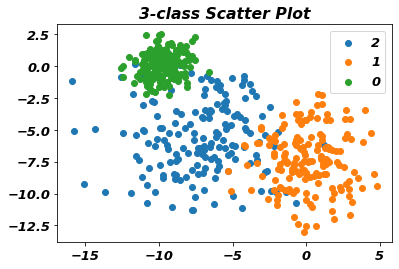

In [ ]:
from numpy import where
from collections import Counter
from sklearn.datasets import make_blobs
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib
fontparams = {'font.size': 13, 'font.weight':'bold', 'font.family':'arial', 'font.style':'italic'}
plt.rcParams.update(fontparams)
labelparams = {'size': 14, 'weight':'semibold', 'family':'serif', 'style':'italic'}
# define dataset
X, y = make_blobs(n_samples=500, centers=3, random_state=9, cluster_std=[1.0,2.0,3.0])
cmap1 = matplotlib.colors.ListedColormap(["#7978FF", "#FF7D7D", '#B3FFAE'])
cmap = plt.get_cmap('gist_yarg')


# summarize dataset shape
print(X.shape, y.shape)
# summarize observations by class label
counter = Counter(y)
print(counter)
# summarize first few examples
for i in range(10):
	print(X[i], y[i])
# plot the dataset and color the by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label), cmap = cmap)
pyplot.title('3-class Scatter Plot', weight = 'bold' ,ha="center")
pyplot.legend()
pyplot.show()
